Jesus David Serpa Pajaro

# Tomar el [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) desde sklearn:

```
from sklearn import datasets

iris = datasets.load_iris()
```
- Realizar la clasifición de las tres clases  a traves de una regresión logística  y realizar multiclasicación, para ello considere lo siguiente:

Si en un dataset existen más de 2 clases, $y={0, 1, 2, 3, ...}$ se debe construir una multiclasificación, una contra todos, la estrategia sugerida es la siguiente.

Sea A, B, C las tres clases. Para estos valores definir:

1. Definir la clase A como la clase 0 y todas las otras B, C como la clase 1
2. Encontrar el valor $h_\theta(X) = P(y=A|x;\theta)$
3. Definir la clase B como la clase 0 y todas las otras A, C como la clase 1
4. Encontrar el valor $h_\theta(X) = P(y=B|x;\theta)$
5. Definir la clase C como la clase 0 y todas las otras A, B como la clase 1
6. Encontrar el valor $h_\theta(X) = P(y=C|x;\theta)$






Ayudas para mejorar las metricas:


- Normalizar cada columna respecto a su media y desviacion estandar

```
(x-mean(x))/std(x)
```

- Determinar los datos outlier

- Construir curvas de aprendizaje

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

1. Para tener una vision general de los datos analiza lo que contiene la clave DESCR del dataset
```
print(iris.DESCR)
```

In [34]:


iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

2. Construye un dataframe:
- los datos se pueden encontrar con la clave "data".
- los nombres de las caracteristicas con la clave: "names_features"
- La clave target nos permite indentificar el tipo de datos.


In [35]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
species_map = {0: "setosa", 1: "versicolor", 2: "virginica"}
df["Species"] = df["target"].map(species_map)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


3. Cambia el nombre de las columnas del dataframe, empleando intrucción como:
```
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols = [col.replace(")" ,"") for col in columns_name ]
```


In [36]:
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols = [col.replace(")" ,"") for col in columns_name ]


4. Analizar el dataframe, numeros de datos, cantidad de null, descripción del dataframe.

In [37]:
print("Tamaño", df.shape)

print(df.info())

# Cantidad de valores nulos por columna
print(df.isnull().sum())

# Descripción estadística
print(df.describe())

# Cantidad de ejemplos de cada clase en 'Target'
print(df["target"].value_counts())


Tamaño (150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   Species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
Species              0
dtype: int64
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.


5. Aplica estadística básica y construye graficas para entender el dataset. Encuentra la matriz de correlacion


6. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

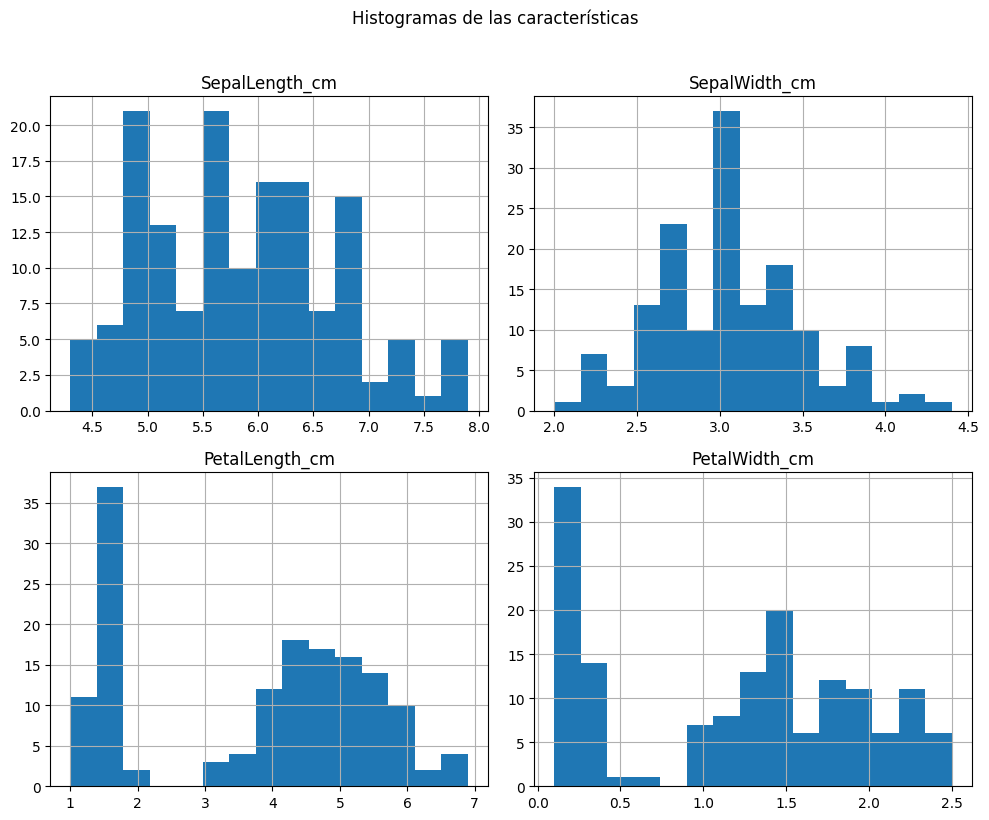

In [38]:
df.columns = cols
df[["SepalLength_cm", "SepalWidth_cm", "PetalLength_cm", "PetalWidth_cm"]].hist(
    bins=15, figsize=(10, 8)
)
plt.suptitle("Histogramas de las características", y=1.02)
plt.tight_layout()
plt.show()

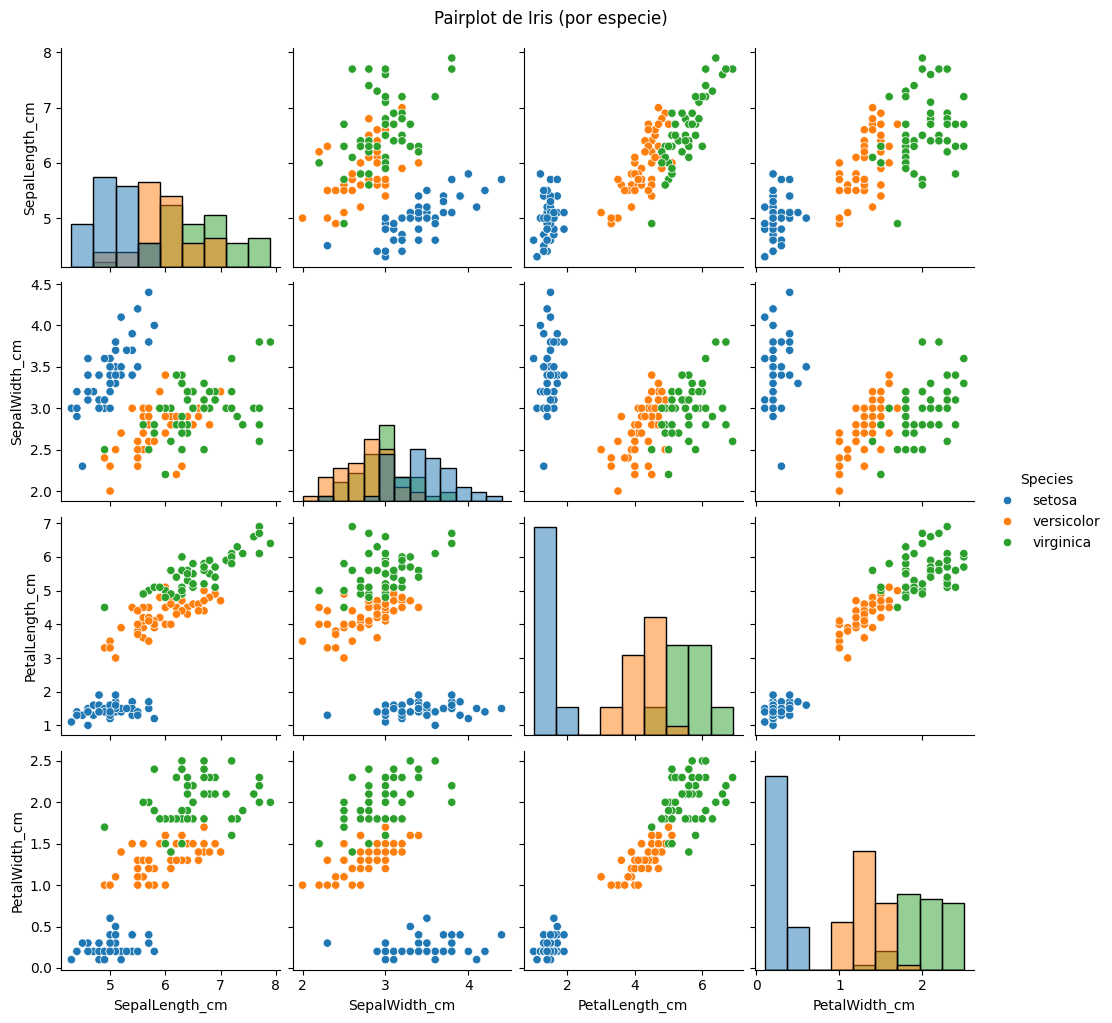

In [39]:
sns.pairplot(
    df,
    vars=["SepalLength_cm", "SepalWidth_cm", "PetalLength_cm", "PetalWidth_cm"],
    hue="Species",
    diag_kind="hist"
)
plt.suptitle("Pairplot de Iris (por especie)", y=1.02)
plt.show()

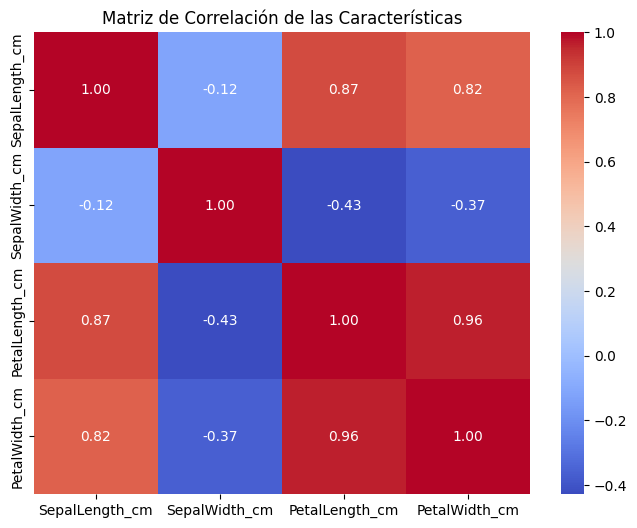

In [41]:
correlation_matrix = df.drop(columns=['Target', 'Species']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación de las Características")
plt.show()


7. Separar los datos en datos de entramiento y test, prueba la siguiente instruccion:
```
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]
```
¿Cómo se estan seprando los datos?


In [42]:

# Supongo que ya tienes df con la columna "Target"

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

print("Tamaño conjunto de entrenamiento:", strat_train_set.shape)
print("Tamaño conjunto de prueba:", strat_test_set.shape)

print("\nProporciones por clase en el dataset completo:")
print(df["Target"].value_counts(normalize=True))

print("\nProporciones por clase en el conjunto de entrenamiento:")
print(strat_train_set["Target"].value_counts(normalize=True))

print("\nProporciones por clase en el conjunto de prueba:")
print(strat_test_set["Target"].value_counts(normalize=True))


Tamaño conjunto de entrenamiento: (120, 6)
Tamaño conjunto de prueba: (30, 6)

Proporciones por clase en el dataset completo:
Target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

Proporciones por clase en el conjunto de entrenamiento:
Target
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

Proporciones por clase en el conjunto de prueba:
Target
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64


8. Construye un modelo empleando una regresión logística, para clasificar la clase setosa y no setosa, emplea la libreria sklearn.


In [43]:
feature_cols = ["SepalLength_cm", "SepalWidth_cm", "PetalLength_cm", "PetalWidth_cm"]

X_train = strat_train_set[feature_cols]
X_test  = strat_test_set[feature_cols]

# 2. Variable objetivo binaria:
'''
  1 -> setosa (Target == 0)
  0 -> no setosa (Target == 1 o 2)
'''
y_train = (strat_train_set["Target"] == 0).astype(int)
y_test  = (strat_test_set["Target"] == 0).astype(int)

#Crear y entrenar el modelo de regresión logística
log_reg_bin = LogisticRegression(max_iter=1000)
log_reg_bin.fit(X_train, y_train)

y_pred = log_reg_bin.predict(X_test)

print("Accuracy (setosa vs no setosa):", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=["No setosa", "Setosa"]))


Accuracy (setosa vs no setosa): 1.0

Matriz de confusión:
[[20  0]
 [ 0 10]]

Reporte de clasificación:
              precision    recall  f1-score   support

   No setosa       1.00      1.00      1.00        20
      Setosa       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



9. Determine  la frontera de clasificación:
```
X_new = np.linspace(-10, 10, 1000).reshape(-1, 1)#Generamos los valores de X_new
prob = log_reg.predict_proba(X_new)

decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary
```

In [44]:
X_train_1d = strat_train_set[["PetalLength_cm"]]
X_test_1d  = strat_test_set[["PetalLength_cm"]]

# Variable binaria: 1 = setosa, 0 = no setosa
y_train_bin = (strat_train_set["Target"] == 0).astype(int)
y_test_bin  = (strat_test_set["Target"] == 0).astype(int)

log_reg_1d = LogisticRegression()
log_reg_1d.fit(X_train_1d, y_train_bin)

LogisticRegression()

In [45]:
X_new = np.linspace(
    df["PetalLength_cm"].min() - 1,
    df["PetalLength_cm"].max() + 1,
    1000
).reshape(-1, 1)

# Probabilidades predichas
prob = log_reg_1d.predict_proba(X_new)

# Frontera
decision_boundary = X_new[prob[:, 1] >= 0.5][0]
print("Frontera de decisión (PetalLength_cm ≈):", decision_boundary[0])


Frontera de decisión (PetalLength_cm ≈): 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Columnas de prob:

prob[:, 0] = P(y=0 | x)  -> no setosa

prob[:, 1] = P(y=1 | x)  -> setosa


10. Encontrar una gráfica de la regresión logística  con los valores de probabilidad



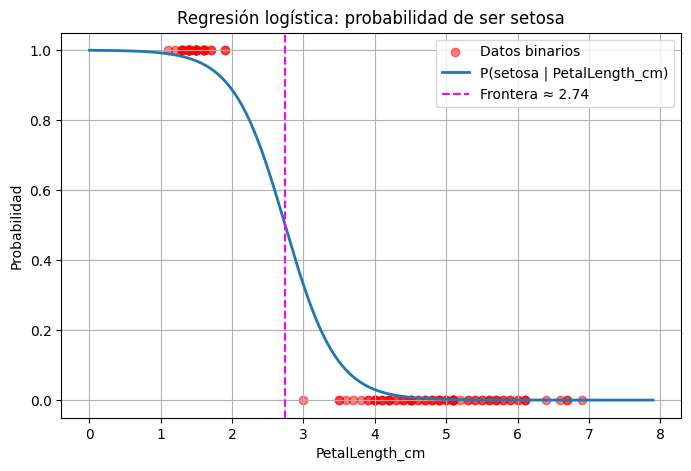

In [46]:
# 1. Generar un rango de valores para PetalLength_cm
X_new = pd.DataFrame(
    np.linspace(
        df["PetalLength_cm"].min() - 1,
        df["PetalLength_cm"].max() + 1,
        1000
    ),
    columns=["PetalLength_cm"]
)

# 2. Calcular las probabilidades P(y=1 | x) = P(setosa | PetalLength_cm)
prob = log_reg_1d.predict_proba(X_new)  # prob[:, 1] es la clase 1 (setosa)

# 3. (Opcional) Frontera de decisión
theta0 = log_reg_1d.intercept_[0]
theta1 = log_reg_1d.coef_[0, 0]
decision_boundary = -theta0 / theta1

# 4. Graficar
plt.figure(figsize=(8, 5))

# Puntos de entrenamiento (0 o 1)
plt.scatter(X_train_1d["PetalLength_cm"], y_train_bin, alpha=0.5, color = 'r' ,label="Datos binarios")

# Curva sigmoide de probabilidad
plt.plot(X_new["PetalLength_cm"], prob[:, 1], linewidth=2, label="P(setosa | PetalLength_cm)")

# Línea de frontera de decisión
plt.axvline(x=decision_boundary, linestyle="--", color = 'magenta' , label=f"Frontera ≈ {decision_boundary:.2f}")

plt.xlabel("PetalLength_cm")
plt.ylabel("Probabilidad")
plt.title("Regresión logística: probabilidad de ser setosa")
plt.ylim(-0.05, 1.05)
plt.legend()
plt.grid(True)
plt.show()



11. Construye el multiclasificador. Puede emplear los metodos dentro de logistic regresión.


In [47]:
X_train = strat_train_set[feature_cols]
y_train = strat_train_set["Target"]

X_test  = strat_test_set[feature_cols]
y_test  = strat_test_set["Target"]

# 2. Crear el modelo de regresión logística multiclasificador
#    multi_class="ovr" -> one-vs-rest (una contra todos)
log_reg_multi = LogisticRegression(multi_class="ovr", max_iter=1000)
log_reg_multi.fit(X_train, y_train)

# 3. Predicciones
y_pred = log_reg_multi.predict(X_test)

# 4. Evaluación del modelo
print("Accuracy multiclase:", accuracy_score(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(
    y_test,
    y_pred,
    target_names=["setosa (0)", "versicolor (1)", "virginica (2)"]
))

Accuracy multiclase: 0.9333333333333333

Matriz de confusión:
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]

Reporte de clasificación:
                precision    recall  f1-score   support

    setosa (0)       1.00      1.00      1.00        10
versicolor (1)       1.00      0.80      0.89        10
 virginica (2)       0.83      1.00      0.91        10

      accuracy                           0.93        30
     macro avg       0.94      0.93      0.93        30
  weighted avg       0.94      0.93      0.93        30



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



















12. Dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?


In [48]:
X_new = np.array([[4.9, 5.0, 1.8, 0.3]])

probs = log_reg_multi.predict_proba(X_new)

print("Orden de las clases:", log_reg_multi.classes_)
print("Probabilidades:", probs)

Orden de las clases: [0 1 2]
Probabilidades: [[9.92194693e-01 7.79800430e-03 7.30248601e-06]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
